In [1]:
# Tokenize the data
# remove punctuations
# remove numbers

In [1]:
import pandas as pd
import numpy as np
import time
import random
import multiprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from gensim.models import Word2Vec

In [2]:
cores = multiprocessing.cpu_count()
cores

6

In [3]:
df = pd.read_excel('data-labeled/combined-super-clean-data.xlsx')
df.columns = ['raw', 'label']

In [4]:
df.tail(2)

,raw,label
11916,most of users are still not aware with blockch...,other
11917,what are the attractive features in your proje...,other


#### '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
df["clean"] = df['raw'].str.replace('[\',\?\(\)!@#$\+-\.\/\^*~|\{\}=\d/]+','', regex=True)

In [6]:
df['split'] = df['clean'].str.split()

In [7]:
df['word_count'] = df['split'].apply(lambda x: len(x))

In [8]:
df = df[df['word_count'] > 3]

In [9]:
# re.sub(
#     string="""'/ adrian, .wel~come - to <<<url/>>> sol{ve + ! the (^test @= bracket) #equa|tion $ to * j{}oin the chat 3 9 = ?', i has been warned by drew | <<<url>>> 1/2 reason no investment advice""",
#     repl='',
#     pattern='[\',\?\(\)!@#$\+-\.\/\^*~|\{\}=\d/]+'
# )

In [10]:
# rand = random.randint(0, 11917)
# df.loc[rand, 'clean'], df.loc[rand, 'new']

In [11]:
df.tail()

,raw,label,clean,split,word_count
11913,do you have an ambassador program available? i...,other,do you have an ambassador program available if...,"[do, you, have, an, ambassador, program, avail...",25
11914,covid 19 has slowed many economies around the ...,other,covid has slowed many economies around the wo...,"[covid, has, slowed, many, economies, around, ...",35
11915,are you planning to promote your project in co...,other,are you planning to promote your project in co...,"[are, you, planning, to, promote, your, projec...",28
11916,most of users are still not aware with blockch...,other,most of users are still not aware with blockch...,"[most, of, users, are, still, not, aware, with...",27
11917,what are the attractive features in your proje...,other,what are the attractive features in your proje...,"[what, are, the, attractive, features, in, you...",25


In [22]:
# model = Word2Vec(sentences=df['clean'].values, vector_size=200, window=5, min_count=1, workers=4)
model = Word2Vec(
    min_count=1,
    window=3,
    vector_size=300,
    # sample=6e-5, 
    # alpha=0.03, 
    # min_alpha=0.0007, 
    # negative=20,
    workers=cores-1
)

In [23]:
t = time.time()
model.build_vocab(df['split'].values, progress_per=10000)
print('Time to build vocab: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to build vocab: 0.01 mins


In [ ]:
no_of_epochs = 5000
t = time.time()
model.train(
    df['split'].values, 
    total_examples=model.corpus_count, 
    epochs=no_of_epochs, 
    report_delay=1
)
print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

model.wv.save_word2vec_format(f'model-assets/word-to-vec-model-{str(no_of_epochs)}-epochs.bin', binary=True)

In [38]:
model.wv.most_similar('good')

[('great', 0.34327104687690735),
 ('nice', 0.32686182856559753),
 ('todaysovryn', 0.30696722865104675),
 ('takeoff', 0.2868631184101105),
 ('dfsg', 0.2782213091850281),
 ('vulnerable', 0.2761835753917694),
 ('mainland', 0.2661237120628357),
 ('subme', 0.26081979274749756),
 ('ambitious', 0.2528322637081146),
 ('new', 0.2525070905685425)]

In [40]:
# model.wv.get_vector('great')

In [42]:
a.shape, b.shape

((10131, 300), (10131, 300))

In [29]:
a = model.wv.vectors
b = np.asarray(model.wv.vectors)

type(a), type(b)

(numpy.ndarray, numpy.ndarray)

In [30]:
b.shape

(10131, 300)

In [31]:
a[0].shape, b[0].shape

((300,), (300,))

In [32]:
b

array([[ 0.91448987,  0.27452567,  0.12849808, ...,  0.56874204,
         3.7109952 ,  1.7803175 ],
       [-1.1382715 ,  0.8383359 ,  0.6806975 , ...,  0.00783749,
         0.21199304, -0.46566764],
       [-0.11991718,  1.0925783 ,  0.47009683, ...,  0.08369756,
         1.0475109 ,  0.48844162],
       ...,
       [ 0.5903889 , -0.29436785,  0.8968889 , ...,  0.47306427,
         0.36688003, -0.34172437],
       [ 0.77332085,  0.196923  ,  1.2287282 , ...,  0.22544411,
         0.85723716, -0.24626899],
       [ 0.22938271, -0.30860507, -0.06396291, ..., -0.01684824,
         0.10719246, -0.19478944]], dtype=float32)

d:\virtualenvs\tele\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\virtualenvs\tele\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


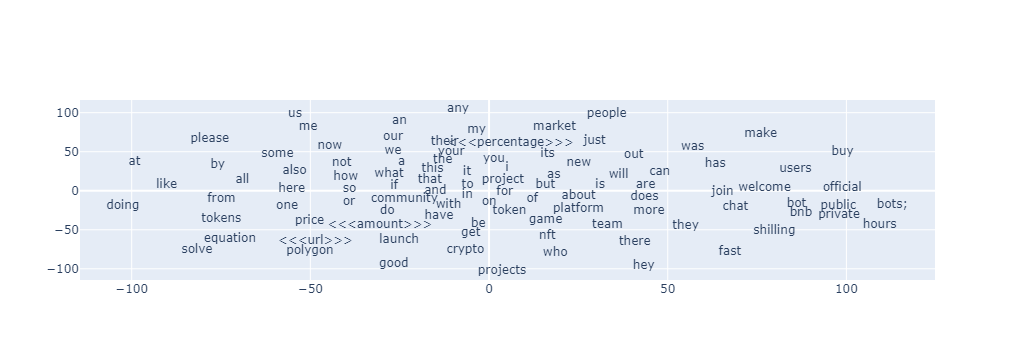

In [33]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors[:100])
    labels = np.asarray(model.wv.index_to_key[:100])  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)
